**1.Import Libraries**

In [2]:
import os 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
import tensorflow as tf
%matplotlib inline

import seaborn as sns
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

**2.Load Training Dataset**

In [3]:
data=pd.read_csv("data.csv")
data['Date']=pd.to_datetime(data['Date']).dt.date
data.set_index("Date",inplace=True)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-01,2772.24,2805.57,2742.53,2755.62,"21,713,431,007.74"
2024-07-31,2708.25,2791.02,2707.57,2760.90,"21,911,503,161.06"
2024-07-30,2669.41,2709.89,2609.02,2696.65,"17,266,391,542.97"
2024-07-29,2706.73,2737.68,2655.15,2661.09,"19,609,177,106.29"
2024-07-28,2606.42,2708.58,2606.40,2681.56,"15,810,596,235.45"


In [4]:
output_dir_path = "E:\\Desktop\\Final Project\\results\\"

**3.Visualization of response variable**

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x400 with 0 Axes>

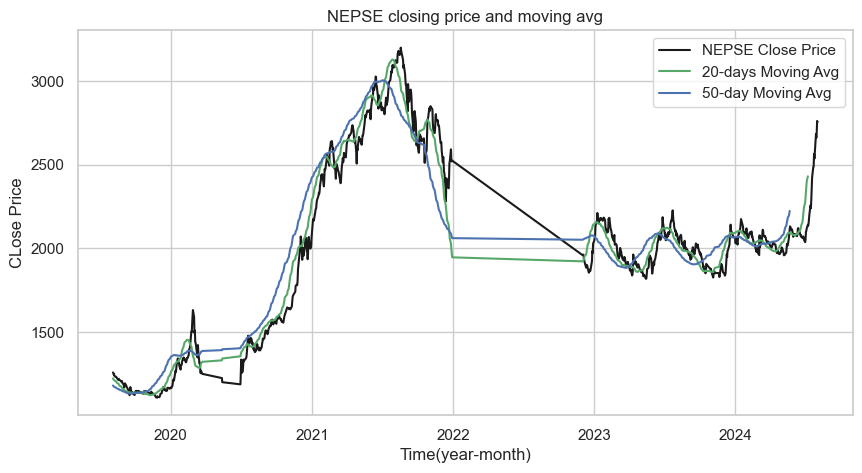

In [5]:
df=data.copy() #copy of dataframe data to df
fin=plt.figure(figsize=(15,4))
df['MA_20']=df['Close'].rolling(20).mean() #calculates 20 days moving average of the closing price cp
df['MA_50']=df['Close'].rolling(50).mean()   #calculates 50days moving avearge of cp

fig=plt.figure(figsize=(10,5))  # create new fig with size 10 inch by 5 inches
fig.set(facecolor="white")

plt.plot(df['Close'],'k',label='NEPSE Close Price')   #plots the cp in balck('k') with label Nepse
plt.plot(df['MA_20'],'g',label='20-day MA')           #plots 20 days movimng avg with green and lable as 20 days
plt.plot(df['MA_50'],'b',label='50-day MA')           #plots 50 days movimng avg with blue and lable as 20 days

plt.legend(['NEPSE Close Price','20-days Moving Avg','50-day Moving Avg'],loc='upper right')       #add legend to plot in upper right corner 
plt.title('NEPSE closing price and moving avg')  #set title of the plot
plt.xlabel('Time(year-month)')           #labels the x-axis
plt.ylabel('CLose Price')                #labels the y-axis

#specify the path where plot image will be saved
output_dir_path = "E:\\Desktop\\Final Project\\results\\"
fig.savefig(output_dir_path + 'original_data_plus_moving_averages.png', dpi=600)     #save fig as png file
plt.show

**4.Function to clean percentage strings and convert them to floats**

In [9]:
def clean_percentage(column):
    return column.replace('[\%,]', '', regex=True).astype(float) / 100.0

# Apply the function to all columns with percentage strings
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = clean_percentage(data[col])
        except ValueError:
            data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with any NaN values
data = data.dropna()

In [14]:
correlation_matrix=data.corr()
print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.999377  0.999295  0.998310  0.757248
High    0.999377  1.000000  0.999218  0.999325  0.760721
Low     0.999295  0.999218  1.000000  0.999298  0.757334
Close   0.998310  0.999325  0.999298  1.000000  0.759650
Volume  0.757248  0.760721  0.757334  0.759650  1.000000


**5.Correlation Heatmap**

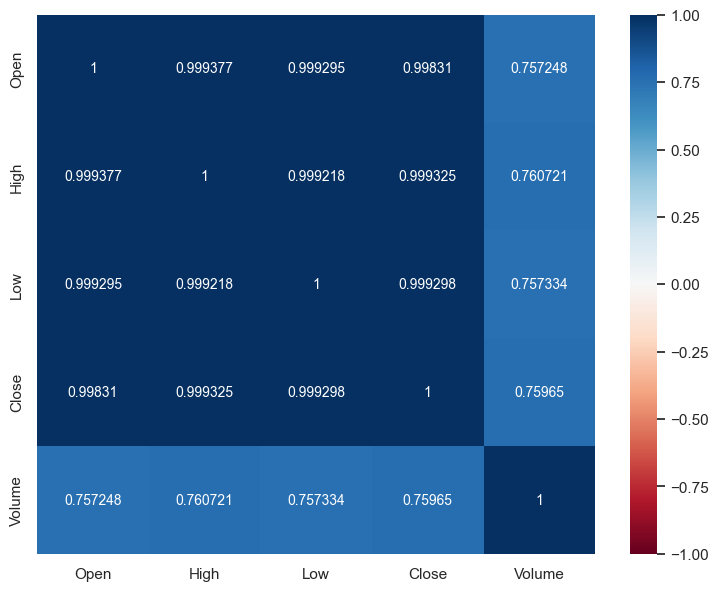

In [19]:
fig=plt.figure(figsize=(9,7))  #create new fig with size 14 inch by 10 inches

sns.heatmap(correlation_matrix,cmap='RdBu',vmin=-1,vmax=1,annot=True,annot_kws={"size":10},fmt='g')   # create correlation matrix of dataframe data and create heatmap using seaborn
sns.set_style("whitegrid")   #set white background color

fig.savefig(output_dir_path+"Correlation_heatmap.pdf",dpi=600)  # save img as pdf 

**5.Machine Learning Libraries**

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow,keras.layers import Dropout
from tensorflow,keras,layers import COnv2D,Dense
Dropout,COnv1D,MaxPooling2D,MaxPooling1D,Flatten
from tensorflow.kersa import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearm.metrices import mean_squared_error
from sklearn.metrices import mean_absolute_error
from sklearn.metrices import r2_score
import time 
import ast
import 

**6.Supporting Functions**

In [40]:
def mean_absolute_percentage_error(y_true,y_pred):    #calculate mean of absolute percentage error
    return(np.mean(np.abs((y_true-y_pred)/(y_true))*100)) 

def calculate_scores(y_true,y_pred):    #calculate square root of mean square error
    rmse=math.sqrt(mean_squared_error(y_true,y_pred))

    R = np.corrcoef(y_true, y_pred)   #calculates correlation coffn matric betn true and predicted values

    mape=mean_absolute_percentage_error(y_true,y_pred) #computes the mean absolute percentage error 

    dic={'rmse':rmse,'R':R[0,1],'mape':mape}
    return (dic)

def DatasetCreation(dataset,time_step=1):
    #defining function that gives dataset
    #time step which then returns the input and output data
    DataX,DataY=[],[]
    for i in range(len(dataset)-time_setp-1):
        a=dataset[i:(I+time_setp),]
        DataX.append(a)
        DataY.append(dataset[i+time_setp,0])  #dataY contains close price
        return np.array(DataX),np.array(DataY) #convert to numpy array and return 

def data_split(data,split=0.2):   #creating 80% training and 20% testing data 
    l1=int(len(data)*(1-split))
    l2=len(data)-l1
    data1=data.iloc[0:l1,:]   #contain first l1 rows of dataset
    data2=data.iloc[1:len(data),:]    #contains remaining row from index l1 to end 
    return data1,data2

def min_max_transform(data,feature_range=(0,1)):  #scale data using min max scaling betn 0 and 1
    scaler=MinMaxScaler(feature_range)
    return scaler.fit_transform(data)

def min_max_inverse_transform(data_scaled,min_original,max_original): #reverse min-max scaling transform to original scale
    return min_original+data_scaled*(max_original-min_original)

def write_dic_to_file(dic_name,file_name):  #write content of dic to file
    file=open(file_name,'w')
    file.write(str(dic_name))
    file.close()

def read_dic_from_file(fil_name):   #read file content and convert to dictionary
    file=open(file_name,"r")
    contents=file.read()
    dictionary=ast.literal_eval(contents)
    file.close()
    return dictionary

**7.Building MOdel by importimg crucial libraries and adding diff layes to oLSTM**

In [ ]:
from keras.models import Sequential 
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout